In [1]:
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from src.ai.ai import SmolQAgent
from src.ai.player import Player
from src.ai.oppos import RandomAgent, SimpleCleverAgent, BetterSimpleCleverAgent, IntentionallyDumbAgent
from src.ai.utils import soft_update
from src.game.game import Game

In [4]:
player = Player(SmolQAgent())
epoch = 0

In [5]:
win_rate_graph = []
reward_graph = []
loss_graph = []

In [6]:
while True:
    player.agent.train()
    player.agent.epsilon = 0.1
    print(f"Epoch {epoch}")
    player.fight_with_non_player(SimpleCleverAgent(), 2048)
    print("Switching to training mode")
    loss_list = []
    for _ in range(12):
        loss_list.append(player.train_step(96))
        # soft_update(player.target, player.agent, tau=0.001)
        soft_update(player.target, player.agent, tau=0)

    player.agent.eval()
    player.agent.epsilon = 0
    win_rate = player.get_win_rate(SimpleCleverAgent(), 40)
    reward = sum(x.reward for x in player.buffer[-(2048):]) / (2048)
    # reward = 0
    loss = sum(loss_list) / len(loss_list)
    win_rate_graph.append(win_rate)
    reward_graph.append(reward)
    loss_graph.append(loss)
    print(f"Win rate 1: {win_rate:.2%}")
    print(f"Average reward: {reward:.2f}")
    print(f"Average loss: {loss:.4f}")
    print(f"Loss list: {', '.join(f'{x:.2f}' for x in loss_list)}")

    player.purge_buffer()
    epoch += 1

Epoch 0
Switching to training mode
Win rate 1: 57.50%
Average reward: -0.41
Average loss: 28.2150
Loss list: 35.62, 30.11, 32.24, 32.10, 24.14, 27.02, 33.52, 23.28, 26.80, 31.13, 19.71, 22.91
Epoch 1
Switching to training mode
Win rate 1: 46.25%
Average reward: -0.41
Average loss: 18.2918
Loss list: 28.40, 25.17, 14.77, 19.00, 21.88, 19.89, 17.17, 12.60, 18.01, 14.17, 12.86, 15.57
Epoch 2
Switching to training mode
Win rate 1: 55.00%
Average reward: -0.23
Average loss: 14.5498
Loss list: 17.52, 13.41, 15.68, 13.91, 16.72, 12.15, 16.89, 16.90, 13.32, 13.83, 14.81, 9.47
Epoch 3
Switching to training mode
Win rate 1: 50.00%
Average reward: 0.06
Average loss: 13.9911
Loss list: 12.66, 11.94, 12.26, 15.60, 19.97, 13.04, 14.33, 13.90, 12.10, 15.30, 15.43, 11.36
Epoch 4
Switching to training mode
Win rate 1: 45.00%
Average reward: -0.06
Average loss: 11.9237
Loss list: 9.44, 13.03, 10.53, 12.60, 10.48, 10.97, 13.67, 16.06, 8.26, 10.76, 13.10, 14.19
Epoch 5
Switching to training mode
Win rate 

KeyboardInterrupt: 

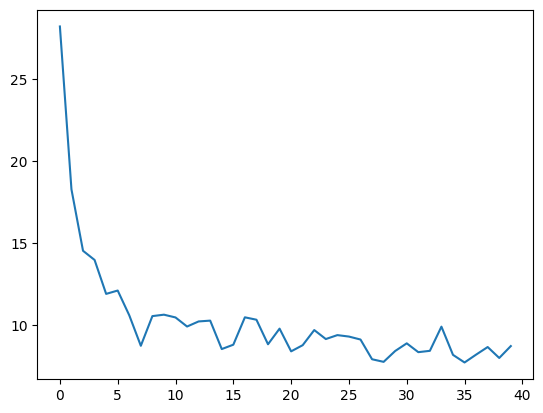

In [9]:
plt.plot(loss_graph)
plt.show()

In [10]:
# visual debug test
game = Game(player.agent, SimpleCleverAgent())
game.reset()
while game.result is None:
    print(game.repr_board())
    print("---------------")
    game.agent_move()
print(game.repr_board())
print(f"result {game.result}")

. . . . W . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . B . . . .
---------------
. . . . █ . . .
. . . . . . . .
. . W . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . B . . . .
---------------
. . . . █ . . .
. . . . . . . .
. . W . . . . .
. . . . . . . .
. . . . . . . .
. B . . . . . .
. . . . . . . .
. . . █ . . . .
---------------
. . . . █ . . .
. . . W . . . .
. . █ . . . . .
. . . . . . . .
. . . . . . . .
. B . . . . . .
. . . . . . . .
. . . █ . . . .
---------------
. . . . █ . . .
. B . W . . . .
. . █ . . . . .
. . . . . . . .
. . . . . . . .
. █ . . . . . .
. . . . . . . .
. . . █ . . . .
---------------
. . . . █ . . .
. W . █ . . . .
. . █ . . . . .
. . . . . . . .
. . . . . . . .
. █ . . . . . .
. . . . . . . .
. . . █ . . . .
result True


In [12]:
player.agent.eval()
player.agent.epsilon = 0
game = Game(player.agent, RandomAgent())
wins = 0
for _ in range(300):
    game.reset()
    while game.result is None:
        game.agent_move()
    wins += 1 if game.result else 0
print(f"Win rate: {wins / 300:.2%}")

Win rate: 94.00%


. . . . █ █ . .
. . . . . W █ .
. . . . . . . █
. . . . . . █ .
. . . . . . . .
. . . . . . . .
. . █ █ █ . . █
. . . █ . B . .


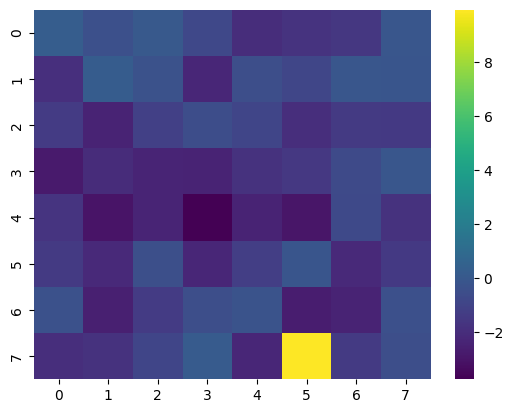

In [14]:
game = Game(RandomAgent(), RandomAgent())
game.reset()
for _ in range(10):
    game.agent_move()
player.agent.eval()
if game.result is None:
    data = player.agent(game.get_state().convert_to_torch().all_boards().unsqueeze(0))
    print(game.repr_board())
    sns.heatmap(data.view(8,8).detach().numpy(), cmap="viridis")